##   Create a machine learning model that can classify the species of an iris flower based on its sepal and petal length and width.

## Preprocessing

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# preprocessing data for duplicates, empty numbers, 

df.duplicated().sum()

3

In [4]:
df = df.drop_duplicates()
df

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.duplicated().sum()

0

In [6]:
#   preprocessing for empty entries in a column

df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
flower          0
dtype: int64

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Feature and Label Separation

In [8]:
X = df.drop('flower', axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
#Normalization

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
s = MinMaxScaler()

X_scaled = s.fit_transform(X)
X_scaled
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df.head()

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [17]:
d = LabelEncoder()
d
y_Encoded = d.fit_transform(y)
y_Encoded
y_Encoded_df = pd.DataFrame(y_Encoded)
y_Encoded_df.tail()

,0
142,2
143,2
144,2
145,2
146,2


In [18]:
y = df['flower']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: flower, Length: 147, dtype: object

## Training and Testing split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_Encoded, test_size=0.2, random_state=40)

In [20]:
X_train

array([[0.66666667, 0.54166667, 0.79661017, 1.        ],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.94444444, 0.25      , 1.        , 0.91666667],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.5       , 0.41666667, 0.66101695, 0.70833333],
       [0.41666667, 0.33333333, 0.69491525, 0.95833333],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.47222222, 0.08333333, 0.6779661 , 0.58333333],
       [0.38888889, 0.33333333, 0.59322034, 0.5       ],
       [0.22222222, 0.75      , 0.15254237, 0.125     ],
       [0.05555556, 0.125     , 0.05084746, 0.08333333],
       [0.80555556, 0.66666667, 0.86440678, 1.        ],
       [0.72222222, 0.5       , 0.79661017, 0.91666667],
       [0.55555556, 0.375     , 0.77966102, 0.70833333],
       [0.55555556, 0.29166667, 0.66101695, 0.70833333],
       [0.91666667, 0.41666667, 0.94915254, 0.83333333],
       [0.58333333, 0.45833333,

In [21]:
y_train

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1,
       2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 2, 0, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2,
       2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 0, 1, 1, 2, 1, 2, 1, 2, 0,
       1, 1, 1, 2, 0, 2, 2, 1, 1, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 2, 1, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1,
       0, 2, 1, 0, 1, 0, 1])

In [22]:
y_test

array([1, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0,
       2, 2, 0, 0, 1, 0, 0, 1])

## Explore the dataset by visualizing the data using scatterplots or histograms.

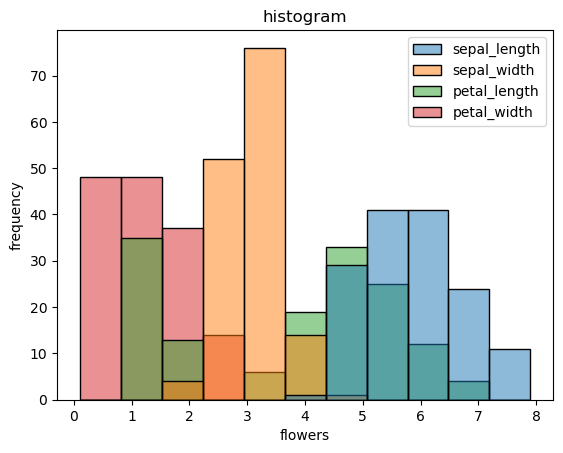

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df.drop('flower', axis=1))
plt.xlabel("flowers")
plt.ylabel("frequency")
plt.title("histogram")
plt.show()

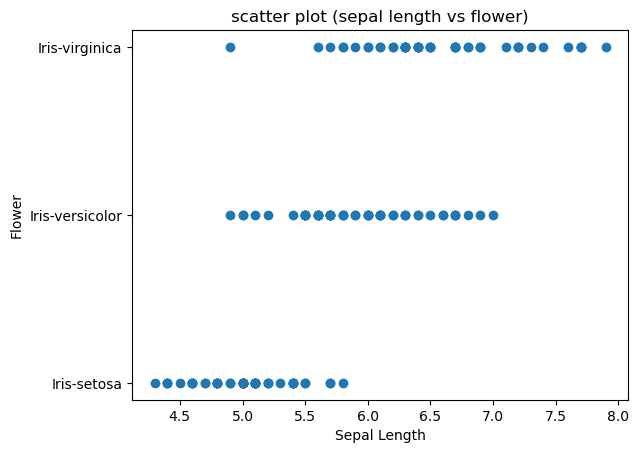

In [23]:
plt.scatter(df['sepal_length'],y)
plt.xlabel('Sepal Length')
plt.ylabel('Flower')
plt.title('scatter plot (sepal length vs flower)')
plt.show()

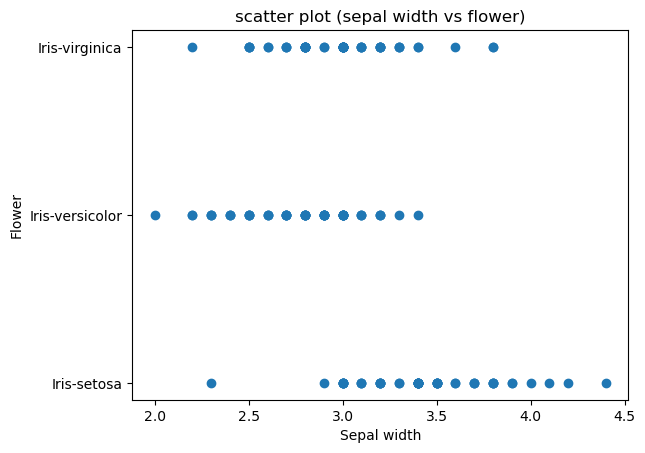

In [24]:
plt.scatter(df['sepal_width'],y)
plt.xlabel('Sepal width')
plt.ylabel('Flower')
plt.title('scatter plot (sepal width vs flower)')
plt.show()

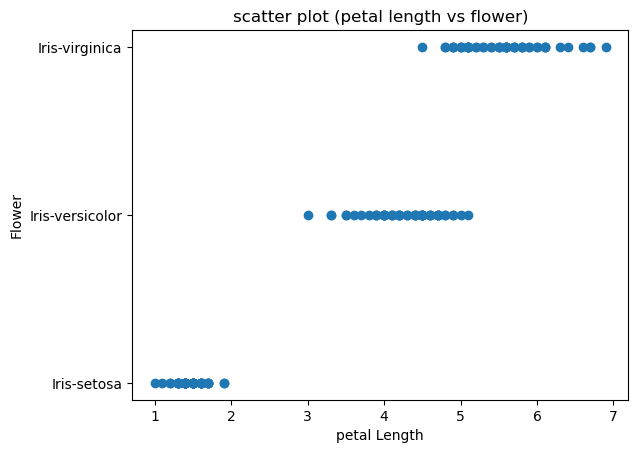

In [25]:
plt.scatter(df['petal_length'],y)
plt.xlabel('petal Length')
plt.ylabel('Flower')
plt.title('scatter plot (petal length vs flower)')
plt.show()

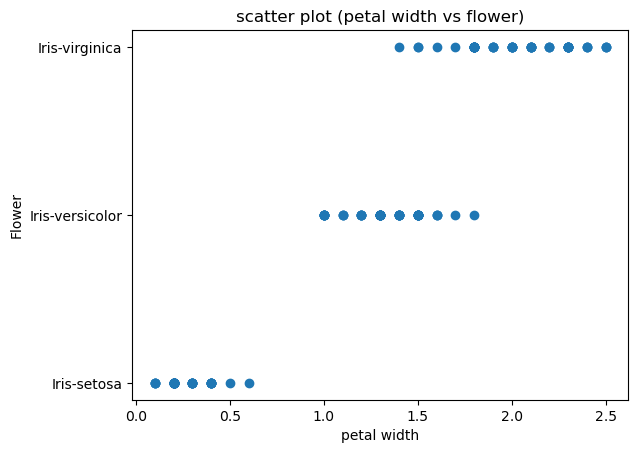

In [26]:
plt.scatter(df['petal_width'],y)
plt.xlabel('petal width')
plt.ylabel('Flower')
plt.title('scatter plot (petal width vs flower)')
plt.show()

## Select a machine learning algorithm to train your model. You can start with a simple algorithm like K-Nearest Neighbours or Decision Trees.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

m = KNeighborsClassifier()
m.fit(X_train,y_train)

KNeighborsClassifier()

In [24]:
y_pred = m.predict(X_test)
y_pred



array([1, 2, 0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 0,
       2, 2, 0, 0, 1, 0, 0, 1])

In [30]:
from sklearn.metrics import accuracy_score , confusion_matrix
acc = accuracy_score(y_test, y_pred)
acc

0.9

In [31]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 8,  0,  0],
       [ 0, 12,  3],
       [ 0,  0,  7]], dtype=int64)

## Use your model to make predictions on new data.

In [32]:
import joblib

In [33]:
joblib.dump(m, 'knn_model.pkl')

['knn_model.pkl']

In [35]:
loaded_model = joblib.load('knn_model.pkl')
loaded_model

KNeighborsClassifier()

In [39]:
X_new = X_test
#X_new

In [40]:
predictions = loaded_model.predict(X_new)
predictions

array([1, 2, 0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 0,
       2, 2, 0, 0, 1, 0, 0, 1])

In [44]:
acc_new = accuracy_score(y_pred , y_test)
acc_new

0.9

In [46]:

# Ask users to input sepal length, sepal width, petal length, and petal width
sepal_length = float(input("Enter sepal length (cm): "))
sepal_width = float(input("Enter sepal width (cm): "))
petal_length = float(input("Enter petal length (cm): "))
petal_width = float(input("Enter petal width (cm): "))

# Input new data
new_data = [[sepal_length, sepal_width, petal_length, petal_width]]

# Make predictions
prediction = loaded_model.predict(new_data)

# Display prediction
print("Predicted specie:", prediction[0])


Enter sepal length (cm): 2.2
Enter sepal width (cm): 2.1
Enter petal length (cm): 2.3
Enter petal width (cm): 2.4
Predicted species: 2


In [49]:
species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
predicted_species = species_mapping[prediction[0]]

In [50]:
predicted_species

'virginica'